**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')

**Read data**

In [ ]:
df = pd.read_csv("2022 (2).csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


**Statistics**

In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [ ]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

**Remove outliers**

This code defines a function called remove_outliers that takes a DataFrame and a column name as input and returns a new DataFrame with the outliers in the specified column removed.

The function works by first sorting the DataFrame by the specified column. It then calculates the first quartile (Q1) and third quartile (Q3) of the column, as well as the interquartile range (IQR) which is the difference between Q3 and Q1. The function then calculates the lower and upper range of the column data by adding and subtracting 1.5 * IQR from Q1 and Q3, respectively.

Finally, the function filters the original DataFrame to include only rows where the value in the specified column is within the lower and upper range, and returns the resulting DataFrame.

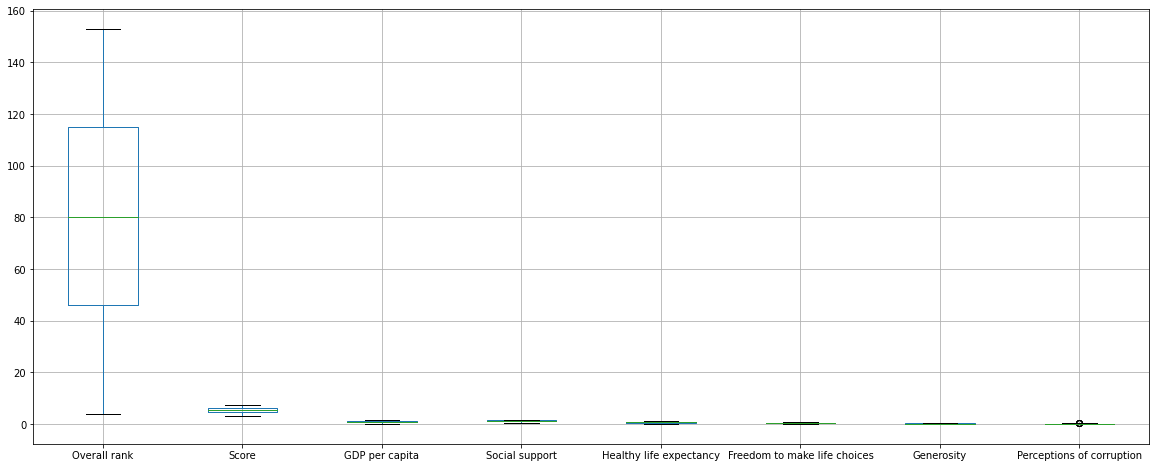

In [ ]:
def remove_outliers(df, column):
    sorted(df)
    Q1, Q3 = np.percentile(df[column],[25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df = df[(df[column] > lower_range) & (df[column] < upper_range)]
    return df

df = remove_outliers(df, 'GDP per capita')
df = remove_outliers(df, 'Social support')
df = remove_outliers(df, 'Healthy life expectancy')
df = remove_outliers(df, 'Freedom to make life choices')
df = remove_outliers(df, 'Generosity')
df = remove_outliers(df, 'Perceptions of corruption')

# Check if there is any outliers

df.boxplot(figsize=(20, 8))
plt.show()

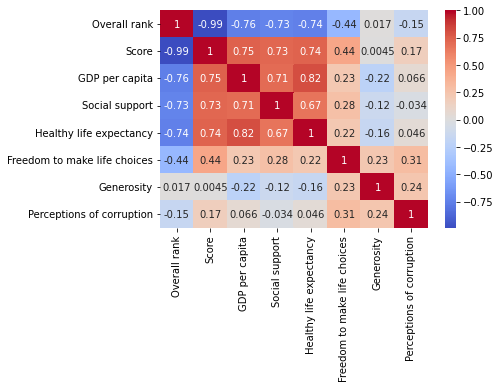

In [ ]:
# Correlation matrix

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

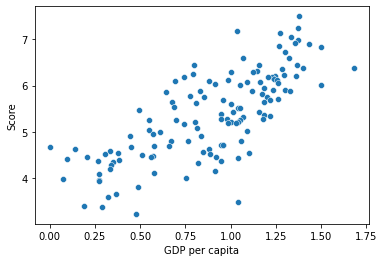

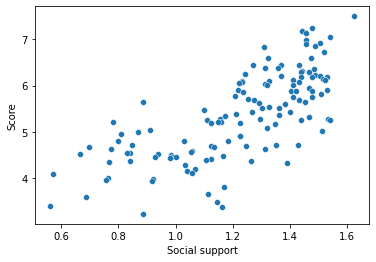

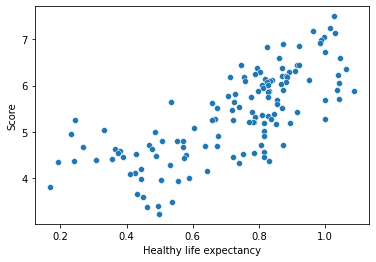

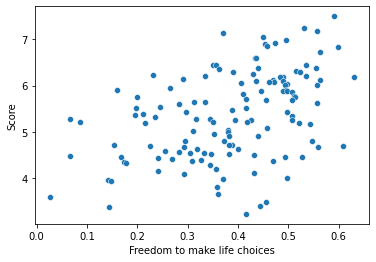

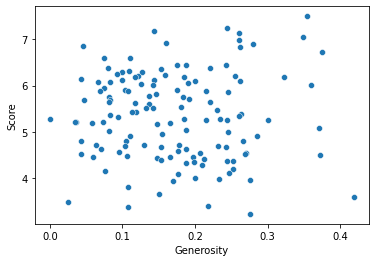

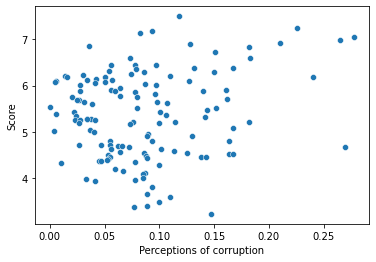

In [ ]:
# Scatter plot

sns.scatterplot(x = 'GDP per capita', y = 'Score', data = df)
plt.show()

sns.scatterplot(x = 'Social support', y = 'Score', data = df)
plt.show()

sns.scatterplot(x = 'Healthy life expectancy', y = 'Score', data = df)
plt.show()

sns.scatterplot(x = 'Freedom to make life choices', y = 'Score', data = df)
plt.show()

sns.scatterplot(x = 'Generosity', y = 'Score', data = df)
plt.show()

sns.scatterplot(x = 'Perceptions of corruption', y = 'Score', data = df)
plt.show()

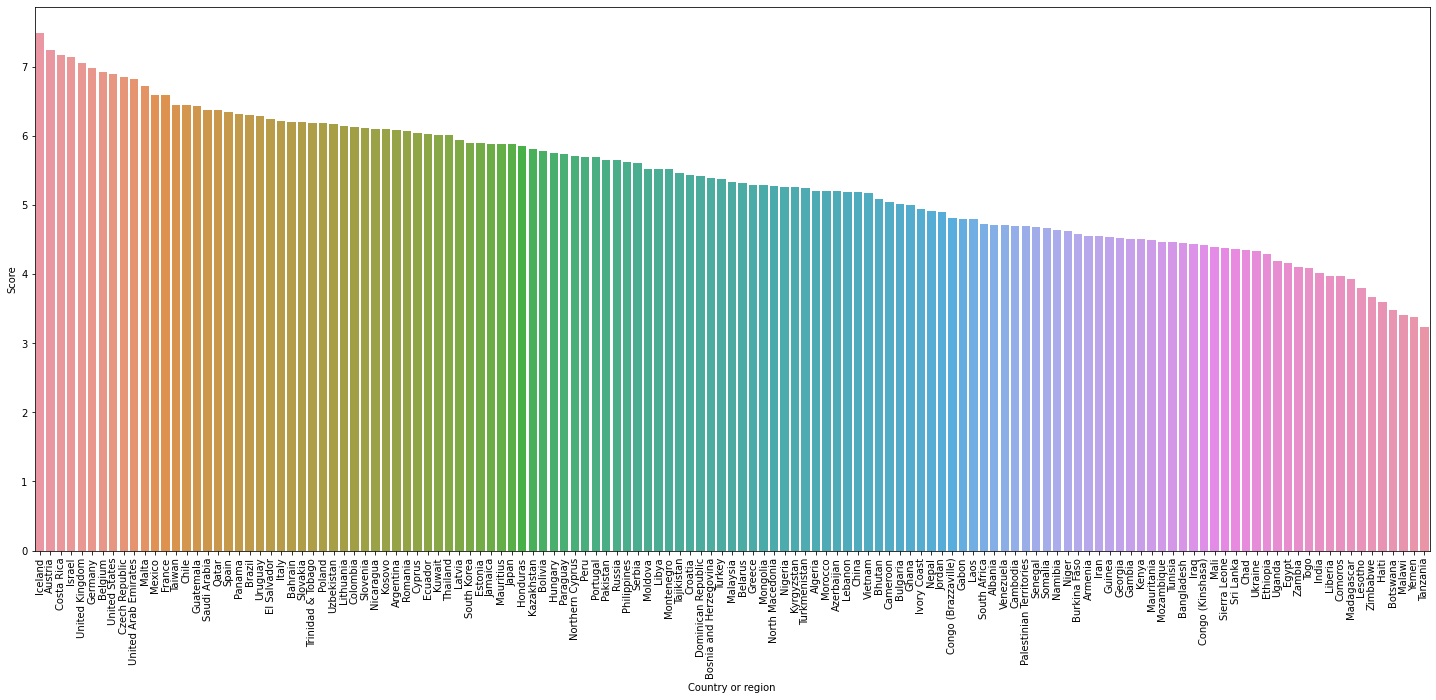

In [ ]:
#Barplot
plt.figure(figsize=(25, 10))
sns.barplot(x='Country or region', y='Score', data=df)
plt.xticks(rotation=90)
plt.show()

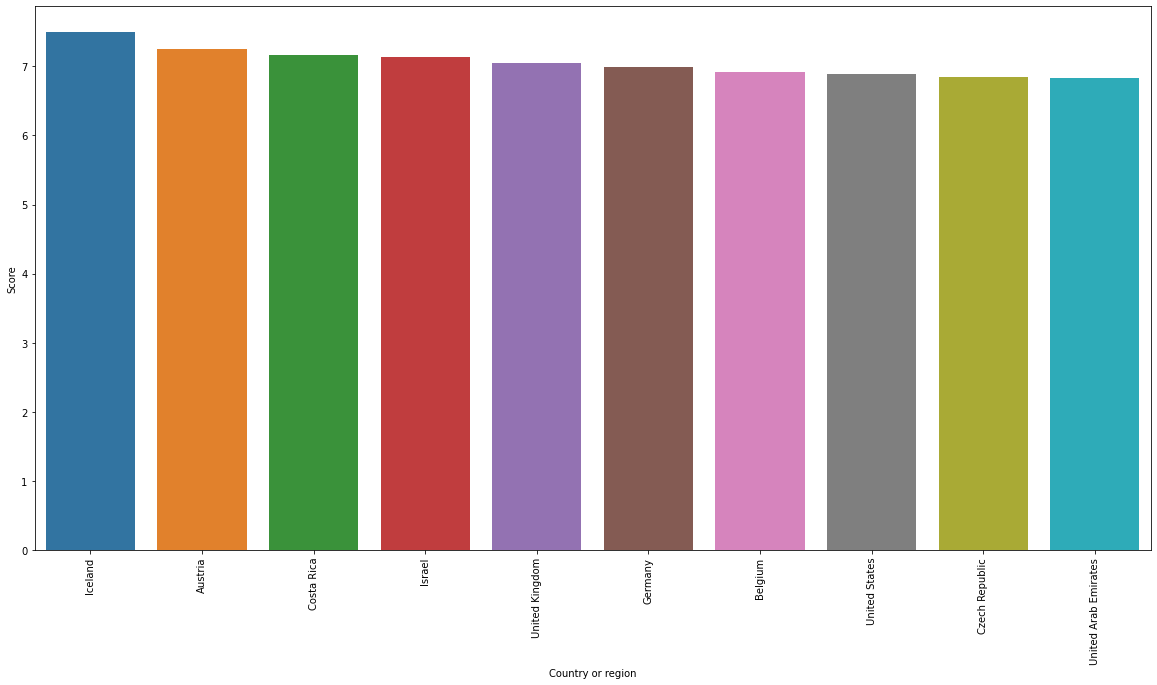

In [ ]:
# Top 10 countries with the highest happiness score

top10 = df.sort_values(by = 'Score', ascending = False).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(x = 'Country or region', y = 'Score', data = top10)
plt.xticks(rotation = 90)
plt.show()

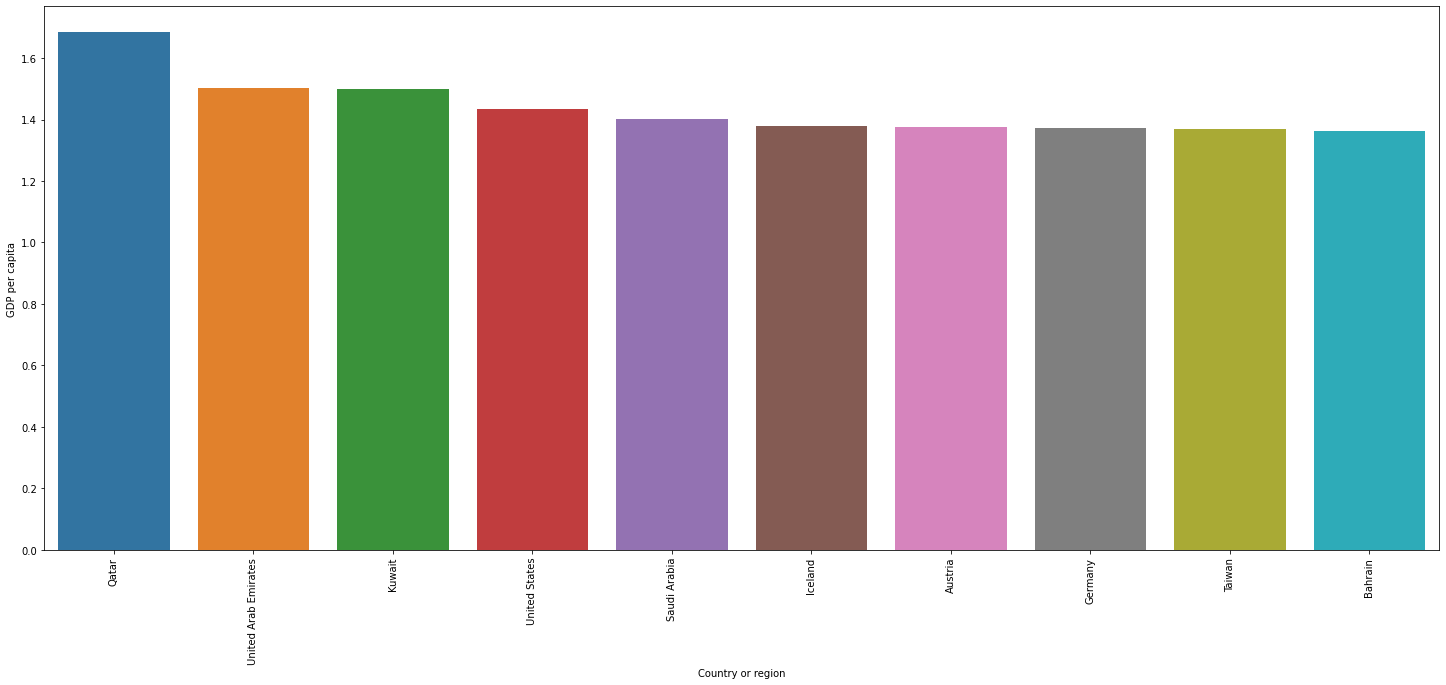

In [ ]:
# Top 10 countries with the highest GDP per capita

top10_gdp = df.sort_values(by = 'GDP per capita', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country or region', y = 'GDP per capita', data = top10_gdp)
plt.xticks(rotation = 90)
plt.show()

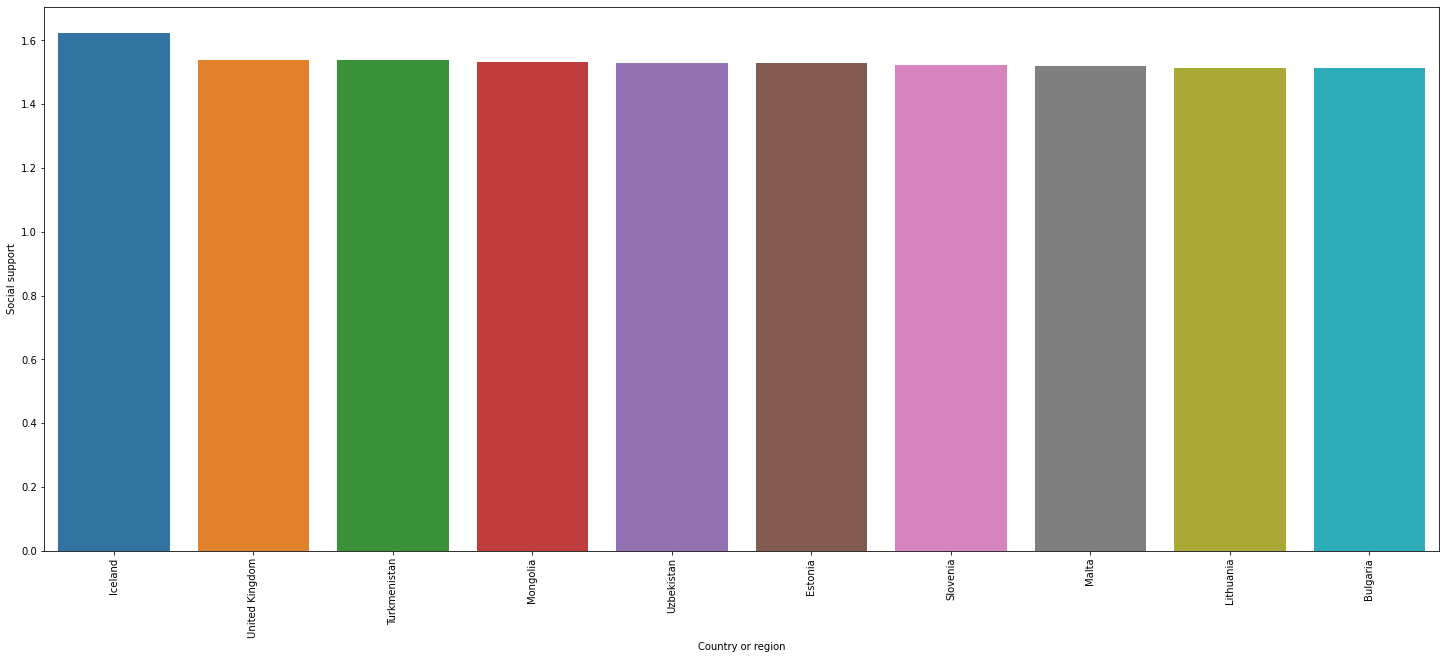

In [ ]:
# Top 10 countries with the highest social support

top10_social = df.sort_values(by = 'Social support', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country or region', y = 'Social support', data = top10_social)
plt.xticks(rotation = 90)
plt.show()

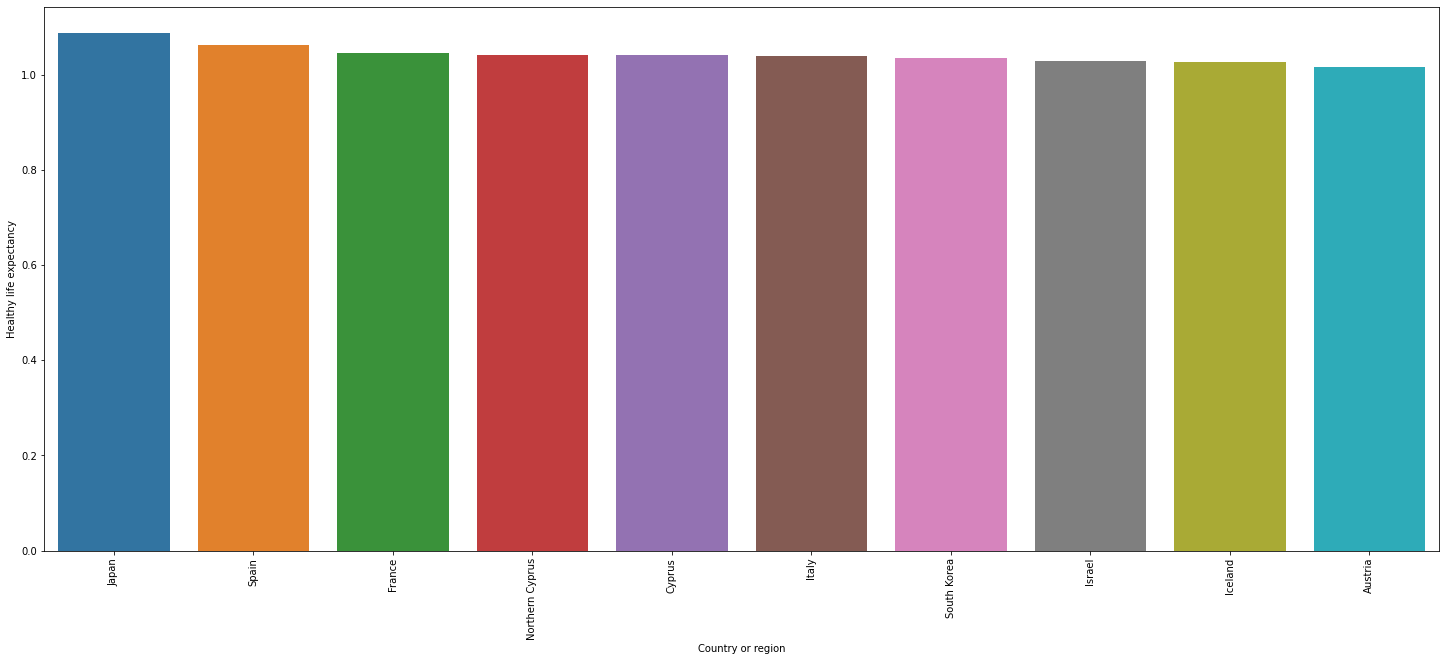

In [ ]:
# Top 10 countries with the highest healthy life expectancy

top10_health = df.sort_values(by = 'Healthy life expectancy', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country or region', y = 'Healthy life expectancy', data = top10_health)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Splitting the data into features and target
X = df.drop(['Country or region', 'Score'], axis=1)
y = df['Score']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Feature Scaling
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

**Model Building**

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print('Linear Regression Score: ', lr_score)

Linear Regression Score:  0.8558459325556199


In [ ]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print('Decision Tree Score: ', dt_score)

Decision Tree Score:  0.8379848540591499


In [ ]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print('Random Forest Score: ', rf_score)

Random Forest Score:  0.8316922056093833


In [ ]:
# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_score = xgb.score(X_test, y_test)
print('XGBoost Score: ', xgb_score)

[15:29:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Score:  0.8262000289587732


In [ ]:
# GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_score = gb.score(X_test, y_test)
print('GradientBoostingRegressor Score: ', gb_score)

GradientBoostingRegressor Score:  0.8254850124003257


In [ ]:
# AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_score = ada.score(X_test, y_test)
print('AdaBoostRegressor Score: ', ada_score)

AdaBoostRegressor Score:  0.8245734448675851


In [ ]:
# KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print('KNeighborsRegressor Score: ', knn_score)

KNeighborsRegressor Score:  0.7479534077117933


**Model Evaluation**

Here i working on a regression problem,so i am going to use evaluation metrics such as mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) to measure the model’s performance.

In [ ]:
# Linear Regression
print('Linear Regression')
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('R2 Score:', r2_score(y_test, lr_pred))

Linear Regression
Mean Squared Error: 0.1567398102556993
Root Mean Squared Error: 0.3959037891403659
Mean Absolute Error: 0.33897017234966076
R2 Score: 0.8558459325556199


In [ ]:
# Decision Tree
print('Decision Tree')
print('Mean Squared Error:', mean_squared_error(y_test, dt_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, dt_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, dt_pred))
print('R2 Score:', r2_score(y_test, dt_pred))


Decision Tree
Mean Squared Error: 0.1761602962962963
Root Mean Squared Error: 0.41971454144012726
Mean Absolute Error: 0.3543703703703703
R2 Score: 0.8379848540591499


In [ ]:
# Random Forest
print('Random Forest')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))

Random Forest
Mean Squared Error: 0.1830023406555565
Root Mean Squared Error: 0.42778772850042873
Mean Absolute Error: 0.3580322222222229
R2 Score: 0.8316922056093833


In [ ]:
# XGBoost
print('XGBoost')
print('Mean Squared Error:', mean_squared_error(y_test, xgb_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, xgb_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, xgb_pred))
print('R2 Score:', r2_score(y_test, xgb_pred))

XGBoost
Mean Squared Error: 0.18897402595982
Root Mean Squared Error: 0.43471142837498533
Mean Absolute Error: 0.36651875545360424
R2 Score: 0.8262000289587732


In [ ]:
# GradientBoostingRegressor
print('GradientBoostingRegressor')
print('Mean Squared Error:', mean_squared_error(y_test, gb_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, gb_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, gb_pred))
print('R2 Score:', r2_score(y_test, gb_pred))


GradientBoostingRegressor
Mean Squared Error: 0.189751468883822
Root Mean Squared Error: 0.4356047163241257
Mean Absolute Error: 0.36437671354641404
R2 Score: 0.8254850124003257


In [ ]:
# AdaBoostRegressor
print('AdaBoostRegressor')
print('Mean Squared Error:', mean_squared_error(y_test, ada_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ada_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, ada_pred))
print('R2 Score:', r2_score(y_test, ada_pred))

AdaBoostRegressor
Mean Squared Error: 0.19074262317207785
Root Mean Squared Error: 0.43674091080648475
Mean Absolute Error: 0.36307578494005255
R2 Score: 0.8245734448675851


In [ ]:
# KNeighborsRegressor
print('KNeighborsRegressor')
print('Mean Squared Error:', mean_squared_error(y_test, knn_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, knn_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, knn_pred))
print('R2 Score:', r2_score(y_test, knn_pred))

KNeighborsRegressor
Mean Squared Error: 0.2740521703703704
Root Mean Squared Error: 0.5234999239449518
Mean Absolute Error: 0.4252222222222223
R2 Score: 0.7479534077117933


**Model Tuning**

In [ ]:
# Random Forest
rf_params = {"max_depth": [3, 5, 8, None],
                "max_features": [3, 5, 10],
                "min_samples_split": [2, 5, 10],
                "min_samples_leaf": [1, 3, 5, 10],
                "bootstrap": [True, False],
                "n_estimators": [100, 500, 1000],
                "random_state": [42]}
rf_model = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2)
rf_model.fit(X_train, y_train)
rf_tuned_score = rf_model.score(X_test,y_test)
print("Best Parameters: " + str(rf_model.best_params_))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


In [ ]:
# GradientBoostingRegressor
gb_params = {"learning_rate": [0.01, 0.1, 0.05],
                "max_depth": [3, 5, 8],
                "max_features": [3, 5, 10],
                "min_samples_split": [2, 5, 10],
                "min_samples_leaf": [1, 3, 5, 10],
                "n_estimators": [100, 500, 1000],
                "subsample": [1, 0.5, 0.75],
                "random_state": [42]}
gb_cv_model = GridSearchCV(gb, gb_params, cv=5, n_jobs=-1, verbose=2)
gb_cv_model.fit(X_train, y_train)
print("Best Parameters: " + str(gb_cv_model.best_params_))


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'random_state': 42, 'subsample': 0.75}


In [ ]:
# AdaBoostRegressor
ada_params = {"learning_rate": [0.01, 0.1, 0.05],
                "n_estimators": [100, 500, 1000],
                "random_state": [42]}
ada_cv_model = GridSearchCV(ada, ada_params, cv=5, n_jobs=-1, verbose=2)
ada_cv_model.fit(X_train, y_train)
print("Best Parameters: " + str(ada_cv_model.best_params_))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 1000, 'random_state': 42}


In [ ]:
# KNeighborsRegressor
knn_params = {"n_neighbors": np.arange(1, 50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=2)
knn_cv_model.fit(X_train, y_train)
print("Best Parameters: " + str(knn_cv_model.best_params_))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best Parameters: {'n_neighbors': 5}


**Model Comparison**

In [ ]:
# Random Forest
rf_tuned = RandomForestRegressor(bootstrap=False, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
rf_tuned.fit(X_train, y_train)
rf_tuned_score = rf_tuned.score(X_test,y_test)
rf_tuned_pred = rf_tuned.predict(X_test)
print('Random Forest Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, rf_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_tuned_pred))
print('R2 Score:', r2_score(y_test, rf_tuned_pred))
print('Accuracy:',rf_tuned_score )

# GradientBoostingRegressor
gb_tuned = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, random_state=42, subsample=0.75)
gb_tuned.fit(X_train, y_train)
gb_tuned_score = gb_tuned.score(X_test,y_test)
gb_tuned_pred = gb_tuned.predict(X_test)
print('GradientBoostingRegressor Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, gb_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, gb_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, gb_tuned_pred))
print('R2 Score:', r2_score(y_test, gb_tuned_pred))
print('Accuracy:',gb_tuned_score )

# AdaBoostRegressor
ada_tuned = AdaBoostRegressor(learning_rate=0.1, n_estimators=1000, random_state=42)
ada_tuned.fit(X_train, y_train)
ada_tuned_score = ada_tuned.score(X_test,y_test)
ada_tuned_pred = ada_tuned.predict(X_test)
print('AdaBoostRegressor Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, ada_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ada_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, ada_tuned_pred))
print('R2 Score:', r2_score(y_test, ada_tuned_pred))
print('Accuracy:',gb_tuned_score )



Random Forest Tuned
Mean Squared Error: 0.18702883250000057
Root Mean Squared Error: 0.4324683023066553
Mean Absolute Error: 0.35884333333333374
R2 Score: 0.8279890291415712
Accuracy: 0.8279890291415712
GradientBoostingRegressor Tuned
Mean Squared Error: 0.17629754641140657
Root Mean Squared Error: 0.4198780137270902
Mean Absolute Error: 0.34993864468386954
R2 Score: 0.8378586247220206
Accuracy: 0.8378586247220206
AdaBoostRegressor Tuned
Mean Squared Error: 0.2007606714916978
Root Mean Squared Error: 0.44806324496849526
Mean Absolute Error: 0.3702584006988778
R2 Score: 0.8153598161744557
Accuracy: 0.8378586247220206


In [ ]:
# KNeighborsRegressor
knn_tuned = KNeighborsRegressor(n_neighbors=5)
knn_tuned.fit(X_train, y_train)
knn_tuned_score =knn_tuned.score(X_test,y_test)
knn_tuned_pred = knn_tuned.predict(X_test)
print('KNeighborsRegressor Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, knn_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, knn_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, knn_tuned_pred))
print('R2 Score:', r2_score(y_test, knn_tuned_pred))
print('Accuracy:',knn_tuned_score )

KNeighborsRegressor Tuned
Mean Squared Error: 0.2740521703703704
Root Mean Squared Error: 0.5234999239449518
Mean Absolute Error: 0.4252222222222223
R2 Score: 0.7479534077117933
Accuracy: 0.7479534077117933


In [ ]:
dictionary = {
    "Models":["RandomForestRegressor()","GradientBoostingRegressor()","AdaBoostRegressor()","KNeighborsRegressor()"],
    "old_score":[rf_score,gb_score,ada_score,knn_score],
    "new_score":[rf_tuned_score,gb_tuned_score,ada_tuned_score,knn_tuned_score]
}

In [ ]:
df = pd.DataFrame(dictionary)
df

,Models,old_score,new_score
0,RandomForestRegressor(),0.831692,0.827989
1,GradientBoostingRegressor(),0.825485,0.837859
2,AdaBoostRegressor(),0.824573,0.815360
3,KNeighborsRegressor(),0.747953,0.747953


**Model Visualization**

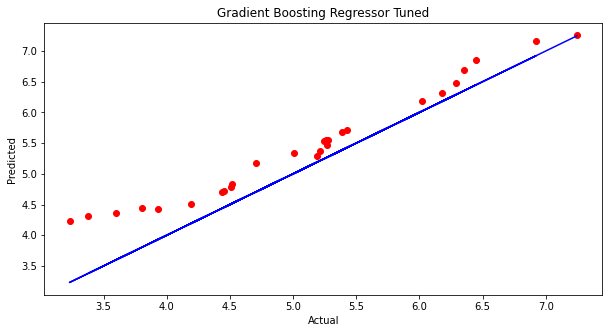

In [ ]:
# GradientBoostingRegressor
gb_tuned_pred = gb_tuned.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, gb_tuned_pred, color='red')
plt.plot(y_test, y_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regressor Tuned')
plt.show()